In [1]:
import cv2, os
import numpy as np
import math
import glob
from matplotlib import pyplot as plt

In [ ]:


def gaussian_filter(sigma, filter_length=None):
  
    if filter_length==None:
        
        filter_length = math.ceil(sigma*5)
       
        filter_length = 2 * (int(filter_length)/2) + 1
    print(filter_length)
    
    sigma=float(sigma)

    filter_length = int(filter_length)
    x_points =  np.array(range(1, filter_length // 2 + 1))
  
    f = np.vectorize(gaussian_value_function_with_fixed_sigma(sigma))

    result = f(x_points)
    result = np.concatenate((result[::-1], [f(0)], result))
    
    result = result / result.sum()
    
    return result

def gaussian_value_function_with_fixed_sigma(sigma):
    
    def gaussian_value_with_fixed_sigma(x):
       
        return gaussian_value(x, sigma)

    return gaussian_value_with_fixed_sigma

def gaussian_value(x, sigma):
   
    sigma2 = sigma*sigma
    return ((1 / math.sqrt(2*math.pi*sigma2)) * math.exp(-(x*x)/(2*sigma2)))

def test_gaussian_filter():
   
    sigma = math.sqrt(1.0/2/math.log(2))
    f = gaussian_filter(sigma, filter_length=3)
    correct_f = np.array([0.25, 0.5, 0.25])
    error = np.abs( f - correct_f)
    if np.sum(error)<0.001:
        print("Congratulations, the filter works!")
    else:
        print("Still some work to do..")

def gaussian_smooth1(img, sigma):
    
    result = np.zeros_like(img)

    filtr = gaussian_filter(sigma)

    for c in range(3):
        
        result[:,:,c] = smooth(img[:,:,c], filtr)

    return result

def smooth(img, filtr):
   
    nb_repeats = filtr.shape[0] // 2
    img = resolve_boundary_effects(img, nb_repeats, 0)
    img = resolve_boundary_effects(img, nb_repeats, 1)
   
    for i in range(img.shape[0]):
        img[i,:] = np.convolve(img[i,:], filtr, 'same')
    for j in range(img.shape[1]):
        img[:,j] = np.convolve(img[:,j], filtr, 'same')
   
    return img[nb_repeats:-nb_repeats, nb_repeats:-nb_repeats]
    
def resolve_boundary_effects(img, nb_repeats, axis=0):
   
    fix = np.ones(img.shape[axis], int)
    
    fix[0] = nb_repeats + 1
    fix[-1] = nb_repeats + 1
    return np.repeat(img, fix, axis)

if __name__ == '__main__':
   
    import cv2

    import glob


    path = glob.glob("m1.png")
    output_path='lung/blurredb'
    c=0
    for file in path:

        img = cv2.imread(file)
       # smoothed_img = gaussian_smooth1(img, 2)
        smoothed_img = cv2.GaussianBlur(img, (3,3), 0)
        cv2.imwrite(f'blurredb/benign{c}.png',smoothed_img)
        c+=1
        cv2.waitKey(0)

        cv2.destroyAllWindows()

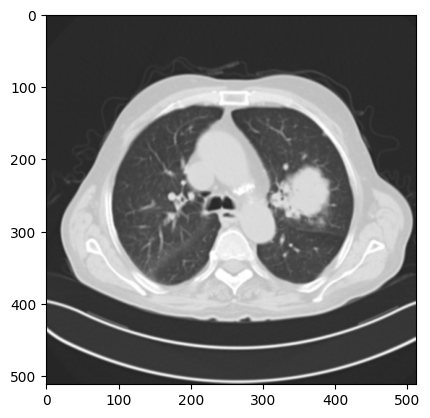

In [3]:
import cv2
image=cv2.imread("m1.jpg")
Gaussian = cv2.GaussianBlur(image, (3, 3), 0)
plt.imshow(Gaussian)


In [ ]:
 plt.imshow(smoothed_img)
    cv2.waitKey(0)
    cv2.imwrite('smoothing1.png', smoothed_img) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()